In [178]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [179]:
df = pd.read_csv('weight-height.csv')

In [180]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [181]:
import seaborn as sns

<Axes: xlabel='Height', ylabel='Count'>

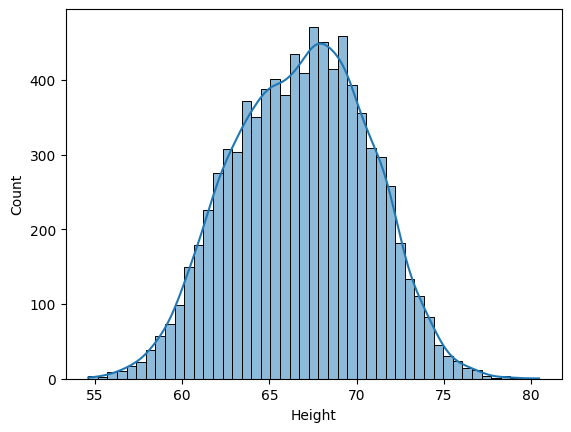

In [182]:
sns.histplot(df['Height'], kde=True)

# kde=True -> to see the bell curve.

# Height -> normally distributed data. But not pure normally distributed data. If it was pure, then there would be equal data in both of the sides.

<Axes: xlabel='Weight', ylabel='Count'>

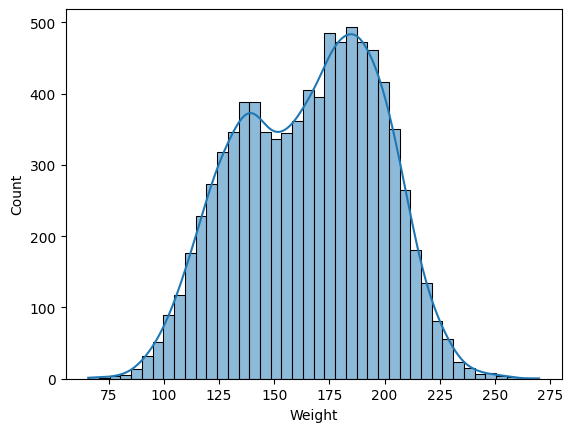

In [183]:
sns.histplot(df['Weight'], kde=True)

# Weight -> Not completely normal distribution but follows distribuiton like normal distribution.

In [184]:
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()

**Z Scores**

In [185]:
# calculating z-score for Height

df['zscores'] = (df['Height'] - df['Height'].mean()) / df['Height'].std()

In [186]:
df.head()

,Gender,Height,Weight,zscores
0,Male,73.847017,241.893563,1.827126
1,Male,68.781904,162.310473,0.512009
2,Male,74.110105,212.740856,1.895435
3,Male,71.730978,220.042470,1.277713
4,Male,69.881796,206.349801,0.797587


In [187]:
# calculating z-score for Weight

df['zscores'] = (df['Weight'] - df['Weight'].mean()) / df['Weight'].std()

In [188]:
df.head()

,Gender,Height,Weight,zscores
0,Male,73.847017,241.893563,2.379884
1,Male,68.781904,162.310473,-0.103678
2,Male,74.110105,212.740856,1.470111
3,Male,71.730978,220.042470,1.697974
4,Male,69.881796,206.349801,1.270664


In [189]:
df.head()

# After applying standard scaler on the Height and Weight column, the z-score and the value of standard scaler are almost same.
# In Standard Scaler, it mainly goes to z-score. Then converts the value of z-score from the actual value. That's why, in Standard Scaler, we can see smaller values and those were actually values of z-score.

,Gender,Height,Weight,zscores
0,Male,73.847017,241.893563,2.379884
1,Male,68.781904,162.310473,-0.103678
2,Male,74.110105,212.740856,1.470111
3,Male,71.730978,220.042470,1.697974
4,Male,69.881796,206.349801,1.270664


In [190]:
df.tail()

,Gender,Height,Weight,zscores
8550,Female,60.483946,110.565497,-1.718492
8551,Female,63.423372,129.921671,-1.114441
8552,Female,65.584057,155.942671,-0.302399
8553,Female,67.429971,151.678405,-0.435475
8554,Female,60.921791,131.253738,-1.072871


In [191]:
df.zscores.max()

3.256685073254163

In [192]:
df.zscores.min()

-3.1161208871313257

In [193]:
df.zscores.mean()+1 # mean is 0

#adding 1 to see the proper result. Suppose, the value is 4.52........e^-14, then it means that after 14 0's, we will get 4.52 and in the same way, if the value is 1.00000 (the real mean value will be the one; which is after 1); which is very close to 0.

1.0

In [194]:
df.zscores.std() # std is 1

1.0

**Standard Scaler**

Height and Weight

In [195]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Extract the columns you want to scale
columns_to_scale = ['Height', 'Weight']
data_to_scale = df2[columns_to_scale]

# Step 1: Create the StandardScaler object
scaler = StandardScaler()

# Step 2: Fit and transform the data using the StandardScaler
scaled_df2 = scaler.fit_transform(data_to_scale)

# Replace the original Height and Weight columns with the scaled data
df[columns_to_scale] = scaled_df2

# Print the original data and the scaled data
print("Original Height Data:")
print(df2)

print("\nScaled Height Data:")
print(scaled_df2)

#
# After applying standard scaler on the Height and weight column, the z-score and the value of standard scaler are almost same.
# Ex: for Height: 73.847017 and z-score = 1.827126 and for Weight: 241.893563 and z-score = 2.379884
# After Standard Scaler, for Height: 73.847017 and z-score = 1.82723263 and for Weight: 241.893563 and z-score = 2.38002342

Original Height Data:
      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
8550  Female  60.483946  110.565497
8551  Female  63.423372  129.921671
8552  Female  65.584057  155.942671
8553  Female  67.429971  151.678405
8554  Female  60.921791  131.253738

[8555 rows x 3 columns]

Scaled Height Data:
[[ 1.82723263  2.38002342]
 [ 0.51203882 -0.10368447]
 [ 1.89554546  1.47019686]
 ...
 [-0.31830573 -0.30241713]
 [ 0.16099957 -0.43550054]
 [-1.52889734 -1.07293379]]


**Remove outlier using Z Scores**

In [196]:
max_z = df.zscores.max()
min_z = df.zscores.min()

In [197]:
min_z

-3.1161208871313257

In [198]:
max_z

3.256685073254163

In [199]:
df[(df['zscores'] >3)]

,Gender,Height,Weight,zscores
2014,Male,3.164916,3.256875,3.256685


In [200]:
df.shape

(8555, 4)

In [201]:
after_remove_otliers = df[(df['zscores'] <3) & (df['zscores']>-3)]
after_remove_otliers #good data (8551 data)

# 4 rows were removed as they are not in the range.

,Gender,Height,Weight,zscores
0,Male,1.827233,2.380023,2.379884
1,Male,0.512039,-0.103684,-0.103678
2,Male,1.895545,1.470197,1.470111
3,Male,1.277788,1.698073,1.697974
4,Male,0.797634,1.270738,1.270664
...,...,...,...,...
8550,Female,-1.642587,-1.718593,-1.718492
8551,Female,-0.879344,-1.114506,-1.114441
8552,Female,-0.318306,-0.302417,-0.302399
8553,Female,0.161000,-0.435501,-0.435475


In [202]:
#who are the outliers?
df[(df['zscores'] >3) | (df['zscores']<-3)] #4 outliers

,Gender,Height,Weight,zscores
151,Male,-0.378974,-3.116303,-3.116121
160,Male,-0.642984,-3.027045,-3.026868
2014,Male,3.164916,3.256875,3.256685
5360,Female,-2.893030,-3.016355,-3.016179


In [203]:
df.shape

(8555, 4)

In [204]:
df[df['zscores'] >3]

,Gender,Height,Weight,zscores
2014,Male,3.164916,3.256875,3.256685


In [205]:
df[df['zscores'] < -3]

,Gender,Height,Weight,zscores
151,Male,-0.378974,-3.116303,-3.116121
160,Male,-0.642984,-3.027045,-3.026868
5360,Female,-2.893030,-3.016355,-3.016179


**Standard Deviation (STD) in Manual Way (Remove outlier)**

calculating STD to find out the outlier

In [206]:
mean = df2.Height.mean()

In [207]:
std = df2.Height.std()

In [208]:
sigma_3 = mean + (3*std)
sigma_3_neg = mean - (3*std)

#Outliers are those which are not in the range of mean value to +3 sigma and mean value to -3 sigma.

In [209]:
sigma_3

78.36428842382125

In [210]:
sigma_3_neg

# Data which are in the range of 55 to 78 (in between), they are good data. If not in this range, then outlier.

55.2555618343576

In [211]:
df2[df2['Height'] > sigma_3] # 5 outliers

,Gender,Height,Weight
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989698
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6328,Female,80.450000,178.020675


In [212]:
df2[df2['Height'] < sigma_3_neg] # 3 outliers (Total 8 outliers)

,Gender,Height,Weight
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
7617,Female,55.148557,88.812412


In [213]:
df[(df['zscores'] >3) | (df['zscores']<-3)]

,Gender,Height,Weight,zscores
151,Male,-0.378974,-3.116303,-3.116121
160,Male,-0.642984,-3.027045,-3.026868
2014,Male,3.164916,3.256875,3.256685
5360,Female,-2.893030,-3.016355,-3.016179


In [214]:
after_remove_df2 = df2[(df2['Height'] > sigma_3) | (df2['Height']<sigma_3_neg)] #only outliers
after_remove_df2

,Gender,Height,Weight
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989698
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6328,Female,80.450000,178.020675
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
7617,Female,55.148557,88.812412


In [215]:
df2.shape

(8555, 3)

In [216]:
df2[(df2.Height<sigma_3_neg) | (df2.Height>sigma_3) ]

,Gender,Height,Weight
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989698
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6328,Female,80.450000,178.020675
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
7617,Female,55.148557,88.812412


In [217]:
df[(df['zscores'] >3) | (df['zscores'] < -3)]

,Gender,Height,Weight,zscores
151,Male,-0.378974,-3.116303,-3.116121
160,Male,-0.642984,-3.027045,-3.026868
2014,Male,3.164916,3.256875,3.256685
5360,Female,-2.893030,-3.016355,-3.016179


In [218]:
after_remove_df2 = df2[(df2['Height'] < sigma_3) & (df2['Height']>sigma_3_neg)] # no outliers
after_remove_df2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


**Boxplot**

{'whiskers': [<matplotlib.lines.Line2D at 0x7e1f66f0faf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e1f66aea740>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e1f66f0fc70>],
 'medians': [<matplotlib.lines.Line2D at 0x7e1f66aeaf80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e1f66abe530>],
 'means': []}

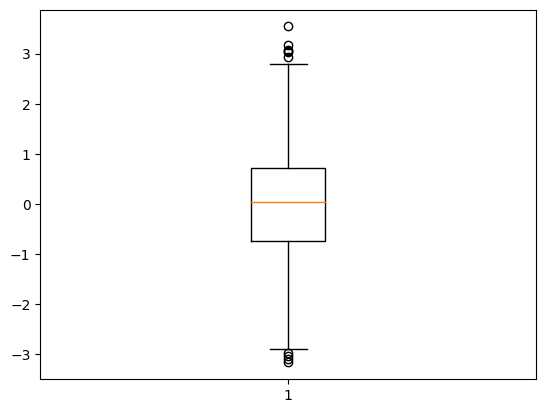

In [219]:
fig, ax = plt.subplots()
ax.boxplot(df['Height'])

Boxplot with Seaborn

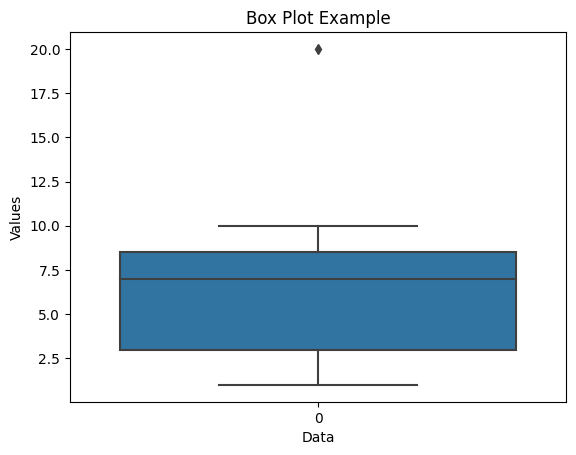

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset
data = [1,2,3,3,5,7,7,8,9,10,20]

# Create a box plot
sns.boxplot(data=data)

# Add labels and title
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box Plot Example')

# Display the plot
plt.show()


Boxplot with matplotlib

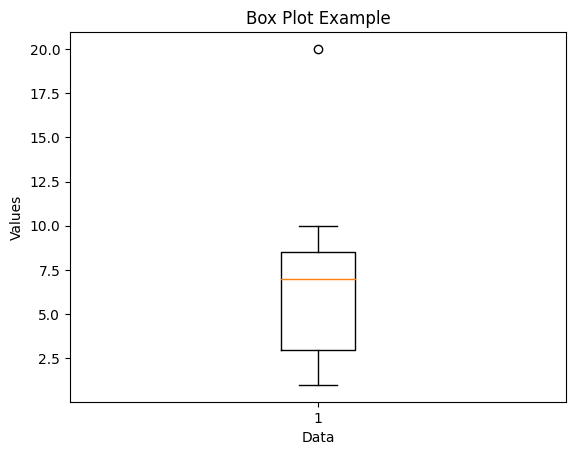

In [221]:
import matplotlib.pyplot as plt
# Sample dataset
data = [1,2,3,3,5,7,7,8,9,10,20]
# Create a figure and axis
fig, ax = plt.subplots()

# Create a box plot
ax.boxplot(data)

# Add labels and title
ax.set_xlabel('Data')
ax.set_ylabel('Values')
ax.set_title('Box Plot Example')
# Display the plot
plt.show()
